In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
font_name_win="MS Gothic"
font_name_lin="Noto Sans CJK JP"
if os.name=="nt":
    font_name=font_name_win
else:
    font_name=font_name_li

In [3]:
xs=[ 
226,161, 55,225,237,  7,  9,  8,185,224,225, 88, 92,110, 62,218, 61, 33,138,145,145, 29,253,195,205,150, 53,145,106,183,239,104,247, 41,206,159, 20,147, 24,108, 43, 23,220,128,248,229,210,199, 92,  3,189, 90, 90,208, 22,150,  7,122, 32,133,172,199,144,177,
]
ys=[
 23, 48,103,141,137, 60, 27,192,182,163,161,196,141,134,  1,  8,152, 62, 12,123, 37,212,121,228, 10,123,136,164, 69,102, 25,235,117, 72, 16,131,214,186, 18, 91,123,250, 40, 68, 53,110, 12, 31,247,178,204,253,139,127,178, 40,183,189,163,186,206, 57,248,196,
]
path=[
 0, 1, 2, 3, 4, 6, 5, 7, 8, 9,10,11,12,13,15,18,14,16,21,17,19,20,24,22,23,27,25,26,28,30,29,31,33,34,32,35,37,36,39,38,40,41,43,45,44,42,46,47,50,48,54,49,51,52,55,53,57,56,58,59,62,60,61,63,
]

In [4]:
assert(len(xs)==64)
assert(len(ys)==64)
path_set=set(path)
assert(len(path_set)==64)

In [5]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

8246.336400860524


<Figure size 432x288 with 0 Axes>

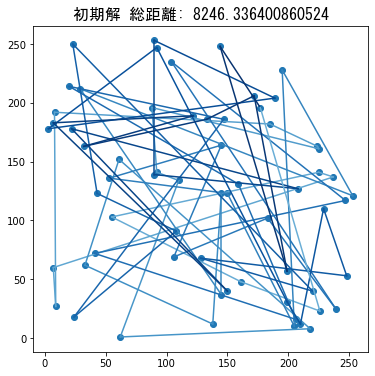

In [6]:
dist1=sum([distance(xs[i],ys[i],xs[i+1],ys[i+1]) for i in range(len(path)-1)])
print(dist1)
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"初期解 総距離: {dist1}",fontname=font_name, fontsize=16)
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))
plt.plot([xs[-1],xs[0]],[ys[-1],ys[0]],color=cm.Blues(0.5))
plt.show()

6444.197345960682


<Figure size 432x288 with 0 Axes>

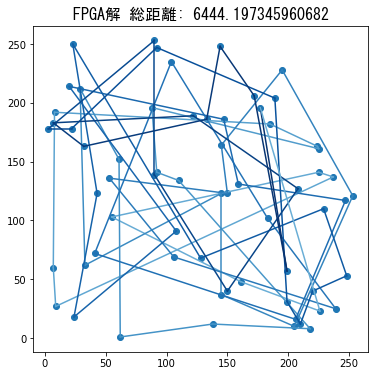

In [7]:
dist2=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
print(dist2)
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"FPGA解 総距離: {dist2}",fontname=font_name,fontsize=16)
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]],color=cm.Blues(i/len(path)/2+0.5))
plt.plot([xs[path[-1]],xs[path[0]]],[ys[path[-1]],ys[path[0]]],color=cm.Blues(0.5))
plt.show()

In [8]:
print(dist1-dist2)
print(hex(int(dist1-dist2)))

1802.1390548998424
0x70a


In [9]:
for i in range(1,len(path)-1):
    for j in range(1,i-1):
        # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
        d1=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
        )
        # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
        d2=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
        )
        if d1>d2:
            print(f"{path[i]}{xs[path[i]],ys[path[i]]} <-> {path[j]}{xs[path[j]],ys[path[j]]}: {d1} -> {d2}")

4(237, 137) <-> 2(55, 103): 559.4120102001976 -> 392.71551564274074
8(185, 182) <-> 2(55, 103): 514.2790063512255 -> 473.3950859624612
10(225, 161) <-> 2(55, 103): 437.2509310284934 -> 427.8815023395563
10(225, 161) <-> 8(185, 182): 364.30049416302154 -> 362.82629598031014
11(88, 196) <-> 8(185, 182): 417.2096889013707 -> 366.8603914663536
13(110, 134) <-> 2(55, 103): 478.8797297554486 -> 456.8992898084031
15(218, 8) <-> 1(161, 48): 435.113108100211 -> 348.36873960435196
15(218, 8) <-> 2(55, 103): 539.6664594176237 -> 389.12017493957353
14(62, 1) <-> 2(55, 103): 521.4099594893135 -> 496.9924076076696
16(61, 152) <-> 7(8, 192): 528.2893598623227 -> 461.74128567340244
21(29, 212) <-> 5(7, 60): 383.1176621892955 -> 347.8318331048512
21(29, 212) <-> 7(8, 192): 527.3393724955714 -> 511.22460500934204
17(33, 62) <-> 2(55, 103): 571.2023545729232 -> 540.6342507285128
17(33, 62) <-> 7(8, 192): 586.8736816049244 -> 402.1312197813364
17(33, 62) <-> 11(88, 196): 474.13303712306845 -> 468.36953497

In [10]:
def linerSearchSwap():
    for i in range(1,len(path)-1):
        for j in range(1,i):
            # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
            d1=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
            )
            # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
            d2=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
            )
            if d1>d2:
                path[i],path[j]=path[j],path[i]